0 250.88425991355845
500 79.85519458655088
1000 64.74694359979149
1500 55.99044904358142
2000 50.256597294231085
2500 46.1715681121015
3000 43.088924075269055
3500 40.66480561254953
4000 38.69824952242322
4500 37.06326703967109
5000 35.676569244452836
0 232.29911908045358
500 41.381197730519986
1000 37.72751657402191
1500 36.008334127715585
2000 35.03093452893848
2500 34.42956823786638
3000 34.044159174417736
3500 33.79122140564477
4000 33.62274550493762
4500 33.509444555096955
5000 33.43276251269894
0 4.994488086099727
500 0.5639531561715776
1000 0.5234407620273944
1500 0.5093250438169918
2000 0.5031234028983274
2500 0.5001000544246174
3000 0.4985130147632062
3500 0.497628993291771
4000 0.4971119053012902
4500 0.49679716251371
5000 0.49659943508343485


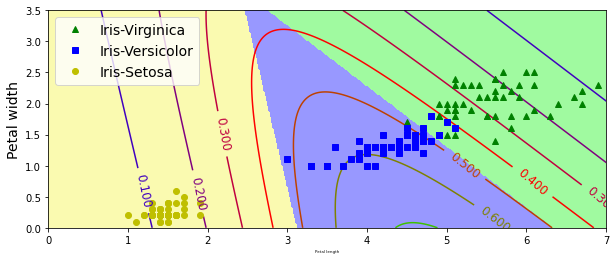

0.9666666666666667

In [2]:
#softmax
import numpy as np
from sklearn import datasets
iris=datasets.load_iris()
X=iris["data"][:,(2,3)]
y=iris["target"]
#バイアス付き
X_with_biass=np.c_[np.ones([len(X),1]),X]
np.random.seed(29)
test_ratio=0.2
validation_ratio=0.2
total_size=len(X_with_biass)

test_size=int(total_size*test_ratio)
validation_size=int(total_size*validation_ratio)
train_size=total_size-test_size-validation_size

rnd_indices=np.random.permutation(total_size)

X_train=X_with_biass[rnd_indices[:train_size]]
y_train=y[rnd_indices[:train_size]]
X_valid=X_with_biass[rnd_indices[train_size:-test_size]]
y_valid=y[rnd_indices[train_size:-test_size]]
X_test=X_with_biass[rnd_indices[-test_size:]]
y_test=y[rnd_indices[-test_size:]]

def to_one_hot(y):
    n_classes=y.max()+1
    m=len(y)
    Y_one_hot=np.zeros((m,n_classes))
    Y_one_hot[np.arange(m),y]=1    #リスト内の対応する行で組み合わせ、arangeは等差数列
    return Y_one_hot

to_one_hot(y_train[:10])

Y_train_one_hot=to_one_hot(y_train)
Y_valid_one_hot=to_one_hot(y_valid)
Y_test_one_hot=to_one_hot(y_test)

#ソフトマックス実装
def softmax(logits):
    exps=np.exp(logits)
    exp_sums=np.sum(exps, axis=1, keepdims=True)
    return exps/exp_sums

n_inputs=X_train.shape[1] #shape次元を指定
n_outputs=len(np.unique(y_train))

#コスト関数
eta=0.01
n_iterations=5001 #rangeの部分を変数化
m=len(X_train)
epsilon=1e-7

Theta=np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits=X_train.dot(Theta)
    Y_proba=softmax(logits)
    loss=-np.mean(np.sum(Y_train_one_hot*np.log(Y_proba+epsilon))) #log(0)回避ε
    error=Y_proba-Y_train_one_hot
    if iteration%500==0:
        print(iteration,loss)
    gradients=1/m*X_train.T.dot(error)
    Theta=Theta - eta*gradients
    
Theta[1:]

logits=X_valid.dot(Theta)
Y_proba=softmax(logits)
y_predict=np.argmax(Y_proba,axis=1)

accuracy_score=np.mean(y_valid==y_predict)
accuracy_score

eta=0.1
n_iterations=5001
m=len(X_train)
epsilon=1e-7
alpha=0.1

Theta=np.random.randn(n_inputs,n_outputs)

for iteration in range(n_iterations):
    logits=X_train.dot(Theta)
    Y_proba=softmax(logits)
    xentropy_loss=-np.mean(np.sum(Y_train_one_hot*np.log(Y_proba+epsilon)))
    l2_loss=1/2*np.sum(np.square(Theta[1:]))##Thetaのバイアス項はいらない
    loss=xentropy_loss+alpha*l2_loss
    error=Y_proba-Y_train_one_hot
    if iteration %500==0:
        print(iteration,loss)
    gradients=    1/m*X_train.T.dot(error)+np.r_[np.zeros([1,n_outputs]),alpha*Theta[1:]]
    Theta=Theta-eta*gradients

    
logits=X_valid.dot(Theta)
Y_proba=softmax(logits)
y_predict=np.argmax(Y_proba,axis=1)

accuracy_score=np.mean(y_predict==y_valid)
accuracy_score

eta=0.1
n_iterations=5001
m=len(X_train)
epsilon=1e-7
alpha=0.1
best_loss=np.infty

Theta=np.random.randn(n_inputs,n_outputs)

for iteration in range(n_iterations):
    logits=X_train.dot(Theta)
    Y_proba=softmax(logits)
    xentropy_loss=-np.mean(np.sum(Y_train_one_hot*np.log(Y_proba+epsilon),axis=1))
    l2_loss=1/2*np.sum(np.square(Theta[1:]))
    loss=xentropy_loss+alpha*l2_loss
    error=Y_proba-Y_train_one_hot
    gradients=1/m*X_train.T.dot(error)+np.r_[np.zeros([1,n_outputs]),alpha*Theta[1:]]
    Theta=Theta-eta*gradients
    
    logits=X_valid.dot(Theta)
    Y_proba=softmax(logits)
    xentropy_loss=-np.mean(np.sum(Y_valid_one_hot*np.log(Y_proba+epsilon),axis=1))
    l2_loss=1/2*np.sum(np.square(Theta[1:]))
    loss=xentropy_loss+alpha*l2_loss
    if iteration%500==0:
        print(iteration,loss)
    if loss<best_loss:
        best_loss=loss
    else:
        print(iteration-1,loss)
        print(iteration,loss,"early stopping!")
        break 

        
logits=X_valid.dot(Theta)
Y_proba=softmax(logits)
y_predict=np.argmax(Y_proba,axis=1)##argmaxで行列の要素の内、軸番号で最大値を取り出す。
accuracy_score=np.mean(y_predict==y_valid)
accuracy_score

##花弁の長さ、幅に対して、均等分布で10000個の格子点を与える。
##その際にmeshgrid(numpy)を利用して、行列を作成する。　その各の点に対して
##学習で求めたThetaを用いて推定値を策定する。　
x0,x1=np.meshgrid(
    np.linspace(0,8,500).reshape(-1,1),
    np.linspace(0,3.5,200).reshape(-1,1))
X_new=np.c_[x0.ravel(),x1.ravel()] ##多次元リストを一次元リストにして返す。
X_new_with_bias=np.c_[np.ones([len(X_new),]),X_new]

logits=X_new_with_bias.dot(Theta)
Y_proba=softmax(logits)
y_predict=np.argmax(Y_proba,axis=1)

zz1=Y_proba[:,1].reshape(x0.shape)
zz=y_predict.reshape(x0.shape)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(X[y==2,0],X[y==2,1],"g^",label="Iris-Virginica")
plt.plot(X[y==1,0],X[y==1,1],"bs",label="Iris-Versicolor")
plt.plot(X[y==0,0],X[y==0,1],"yo",label="Iris-Setosa")
    
from matplotlib.colors import ListedColormap
custom_cmap=ListedColormap(["#fafab0","#9898ff","#a0faa0"])

plt.contourf(x0,x1,zz,cmap=custom_cmap)##ラインで区切られた各エリア
contour=plt.contour(x0,x1,zz1,cmap=plt.cm.brg) ##等高線作成
plt.clabel(contour, inline=1,fontsize=12)
plt.xlabel("Petal length", fontsize=4)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left",fontsize=14)
plt.axis([0,7,0,3.5])
plt.show()
    
logits=X_test.dot(Theta)
Y_proba=softmax(logits)
y_predict=np.argmax(Y_proba,axis=1)
accuracy_score=np.mean(y_predict==y_test)
accuracy_score

In [ ]:

import numpy as np
from sklearn import datasets
iris=datasets.load_iris()
X=iris["data"]
y=iris["target"]
minimum_value_error=float("inf")
eta=0.1
theta=np.zeros(12).reshape(3,4)
best_epoch=None
best_param=None
for epoch in range(1000):
    gradient=0
    for i in range(3):
        grad=0
        for j in range(150):
            s=theta[i].dot(X.T)
            total_s=0
            for number in range(3):
                part=np.exp(theta[number].dot(X))
                total_s+=part
            p=np.exp(s)/total_s
            nabla=(p-(y[j]==i)).dot(X[j].T)
            grad+=nabla
        gradient+=grad
    gradient=gradient/m
    theta=theta-eta*gradient
    entropy=0
    for i in range(150):
        ent=0
        for j in range(3):
            s=theta[j].T.dot(X)
            total_s=0
            for number in range(3):
                part=np.exp(theta[number].T.dot(X))
                total_s+=part
            p=np.exp(s)/total_s
            J=(y[i]==j)*np.log10(p)
            ent+=J
        entropy+=ent
    entropy=-entropy/m
    if entropy<minimum_value_error:
        minimum_value_error=last_entropy
        best_param=theta